In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn

In [2]:
autosave 60

Autosaving every 60 seconds


In [3]:
df_auto = pd.read_csv("autos.csv", sep= ",", encoding='latin-1') #
df_auto.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df_auto.shape

(371528, 20)

https://www.kaggle.com/orgesleka/used-cars-database

In [5]:
df_auto.groupby("brand").sum().sort_values("price").tail()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
brand,,,,,,,
audi,521645668,65888293,5143135,4264200000,197388,0,1784012642
bmw,597833091,80748310,6648176,5346920000,238290,0,2223801824
mercedes_benz,608870530,70718488,5415294,4613640000,212625,0,1803207103
volkswagen,1157447622,159606298,7812445,10239730000,451572,0,3887134507
sonstige_autos,2451508840,8046451,491145,344520000,18024,0,193923176


# Find and answer 3 questions to ask using pandas, including aggregates.

In [6]:
#Question 1: Annonces pour les voitures avec le moins de kilomètres (top 5)
df_auto.sort_values(by='kilometer',ascending=False).tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
269026,2016-04-04 17:31:34,Citroen_berlingo_auch_Tausch,privat,Angebot,300,test,kombi,1998,manuell,90,berlingo,5000,9,benzin,citroen,NaN,2016-04-04 00:00:00,0,65183,2016-04-05 12:08:48
66737,2016-03-11 23:51:52,Fiat_Grande_Punto_1.4_8V,privat,Angebot,3400,test,kleinwagen,2005,manuell,0,punto,5000,12,benzin,fiat,nein,2016-03-11 00:00:00,0,44388,2016-04-05 17:22:24
4708,2016-04-03 19:41:09,Opel_Omega_a_Scheinwerfer_mit_Blinker,privat,Angebot,0,test,NaN,1995,NaN,0,omega,5000,0,NaN,opel,NaN,2016-04-03 00:00:00,0,47647,2016-04-05 20:15:51
119275,2016-03-19 17:47:05,4_Sommerreifen_auf_Stahlfelge,privat,Angebot,0,control,NaN,2009,NaN,0,2_reihe,5000,0,NaN,peugeot,NaN,2016-03-19 00:00:00,0,31547,2016-03-23 06:45:42
337915,2016-03-29 19:06:23,3_er_Golf_Mexico,privat,Angebot,900,test,NaN,2018,automatik,115,golf,5000,0,benzin,volkswagen,ja,2016-03-29 00:00:00,0,55126,2016-04-06 07:45:27


In [7]:
#Question 2: Give the 5 brand with the maximum "annonces" or card ads, top des marques de voitures avec le plus d'annonces
top_mark = df_auto.groupby("brand").size().sort_values(ascending=False).head()
top_mark

brand
volkswagen       79640
bmw              40274
opel             40136
mercedes_benz    35309
audi             32873
dtype: int64

In [8]:
#Question 3:  Count number of automatik or manual gearbox and make a group by on this 2 var
gear = df_auto.groupby("gearbox")["gearbox"].count().sort_values(ascending=False)  # or test = df_auto.groupby("gearbox").gearbox.count()
gear

gearbox
manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [9]:
# Ici on la somme de chaque colonne pour chaque marque de voiture, trier par la somme des prix des voitures, on peut observer sonstige_autos en premier qui correspond à toutes les marques de voiture non répertorié
df_auto.groupby("brand").sum().sort_values("price",ascending=False).head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
brand,,,,,,,
sonstige_autos,2451508840,8046451,491145,344520000,18024,0,193923176
volkswagen,1157447622,159606298,7812445,10239730000,451572,0,3887134507
mercedes_benz,608870530,70718488,5415294,4613640000,212625,0,1803207103
bmw,597833091,80748310,6648176,5346920000,238290,0,2223801824
audi,521645668,65888293,5143135,4264200000,197388,0,1784012642


# Find and display 3 plots using matplotlib, including pivot tables.

In [10]:
# Question1 : affichage de la question 2 et 3 précédentes en diagramme en barres

([<matplotlib.axis.XTick at 0x1bd842f8>,
 [Text(0, 0, 'volkswagen'),
  Text(1, 0, 'bmw'),
  Text(2, 0, 'opel'),
  Text(3, 0, 'mercedes_benz'),
  Text(4, 0, 'audi')])

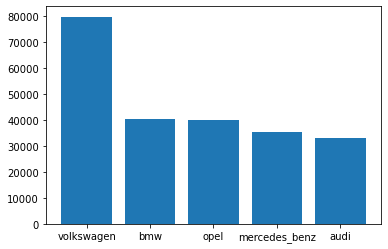

In [11]:
# question 2
plt.bar(range(5), top_mark.head())
plt.xticks(range(5), top_mark.index)

([<matplotlib.axis.XTick at 0x1b8066d0>,
 [Text(0, 0, 'manuell'), Text(1, 0, 'automatik')])

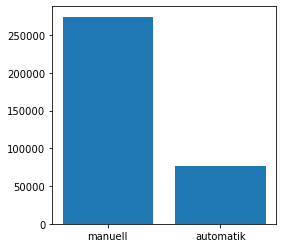

In [12]:
# question 3
plt.figure(figsize=(4,4))
plt.bar(range(2),gear)
# range is 2 because they are 2 column with can use : r = range(min(len(df_auto["gearbox"].unique()),limit))*
plt.xticks(range(2), gear.index)

c:\users\jdelebec\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='vehicleType'>

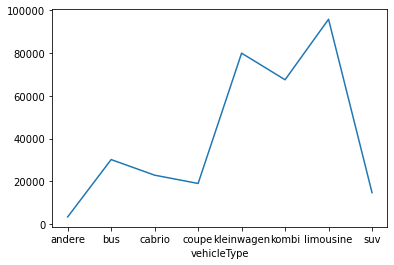

In [13]:
# Question2 : plot number of vehicle of each type

type_vehicle = df_auto.groupby("vehicleType").vehicleType.count()
type_vehicle.plot()

In [14]:
# Question 3 : pivot table: gave mean price for each brand and vehicletype

In [26]:
pivot = df_auto.pivot_table("price",index='vehicleType',columns = 'brand' , aggfunc = np.mean)
pivot

brand,alfa_romeo,audi,bmw,chevrolet,chrysler,citroen,dacia,daewoo,daihatsu,fiat,...,seat,skoda,smart,sonstige_autos,subaru,suzuki,toyota,trabant,volkswagen,volvo
vehicleType,,,,,,,,,,,,,,,,,,,,,
andere,3153.333333,97681.198347,2686.438525,10032.803922,8888.333333,3521.024390,4450.000000,993.800000,1075.000000,3534.767568,...,2766.378378,4706.076923,3186.666667,8.047562e+06,2616.666667,3598.571429,5477.727273,2697.000000,132901.015464,13640.000000
bus,NaN,3485.000000,27569.884615,6189.300000,2630.515982,4409.132179,8606.700000,1262.777778,1201.500000,4014.823460,...,7063.063830,6649.809524,1650.000000,5.248337e+03,3557.764706,1767.464286,6261.194690,NaN,9237.313188,NaN
cabrio,9147.179487,13441.196564,38010.594552,24026.621622,4324.531120,4536.408696,NaN,900.000000,7761.000000,6485.634286,...,NaN,7722.500000,4673.917917,2.700394e+04,8900.000000,2309.361111,5771.323077,5799.486486,6548.038610,10665.802469
coupe,6897.190083,16341.915486,32097.647113,16317.023438,9174.240000,2695.552632,NaN,428.625000,NaN,3801.477778,...,5551.677778,3533.000000,3851.677419,1.046865e+05,10418.625000,3252.500000,5341.879032,3275.000000,14854.182493,6040.930556
kleinwagen,4466.242678,7358.435834,4432.658696,3029.557461,3124.833333,3029.278894,4878.726457,1110.324627,1449.787476,4810.258757,...,3021.803783,4385.953737,3307.055980,3.821480e+05,1769.453782,3468.973631,3765.885463,2013.810345,9261.728276,3912.714286
kombi,3580.161926,17069.568857,9001.496376,4899.090090,4867.845528,3724.929022,4166.642857,816.340426,3420.294118,2079.487912,...,6852.445498,7325.808473,1705.555556,6.471289e+03,3511.162252,1583.359551,5725.737847,1569.227848,5757.728837,3583.711310
limousine,3067.774841,16238.554551,9613.617946,5452.099567,4173.444444,41831.889959,3359.990291,983.981308,3532.106383,2490.146315,...,5826.529638,5326.621622,2842.724138,1.152817e+04,7615.362637,4498.169399,4840.514477,1395.704348,10849.831331,5071.679878
suv,0.000000,24599.234542,15924.963470,9830.491228,5888.391304,10810.540541,9761.972093,1900.000000,2066.918367,8527.000000,...,8711.750000,14389.939394,NaN,1.427418e+04,4720.031746,6721.187251,10104.163673,14500.000000,15898.968344,15269.577465
